# Ecuador Rivers Visualization

This notebook provides an aesthetic visualization of the river network in Ecuador. It uses a combination of GeoPandas and Matplotlib to filter and style the river geometries based on their lengths.

### Key Steps in the Code
**Data Loading:** The notebook imports river data from a compressed shapefile `rivers_ecuador.zip` using GeoPandas.

**Filtering River Lengths:** Only rivers within a specific length range (to 95th percentile) are displayed. This avoids clutter from extremely short or long rivers.

**Dynamic Line Width:** The line widths are adjusted inversely based on river lengths, creating a visually appealing gradient effect.

**Styling and Aesthetics:**

- A dark background enhances the contrast with the river lines styled in varying shades of blue.
- The plot is rendered with no axes or gridlines for an artistic representation of the data.

### Potential Uses
- This visualization can serve as an educational tool for understanding Ecuador's hydrology.
- It offers an example of how geospatial data can be presented artistically for maps and posters.
- It demonstrates techniques for combining data filtering, aesthetics, and visualization.

### Suggested Improvements
- Add a legend or annotation to explain the relationship between the river lengths and line widths/colors.
- Include metadata or sources for the river data for reproducibility.
- Optimize the filtering parameters to enhance visualization for specific audiences or use cases.
- Provide an option to export the plot in high resolution for publications.

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from glob import glob

In [38]:
# Load the shapefile (zipped) containing Ecuador's river data
# This file contains geometries and attributes like river lengths.
rivers_ec = gpd.read_file("rivers_ecuador.zip")

# Define limits for filtering rivers based on their lengths
# Limit_b: Top 5% longest rivers are excluded to remove outliers.
# Limit_a: Setting a low arbitrary value (negative) for potential inclusion of all relevant rivers.
limit_b = rivers_ec['LENGTH_KIL'].quantile(.95)
limit_a = -1000

rivers_ec2 = rivers_ec[(rivers_ec['LENGTH_KIL']>=limit_a)&(rivers_ec['LENGTH_KIL']<=limit_b)].copy()

# Create a 'width' column to dynamically scale line widths for visualization
# The width is inversely proportional to the river length to create a visual gradient.
rivers_ec2['width'] = 15 - rivers_ec2['LENGTH_KIL']
rivers_ec2['width'] = rivers_ec2['width'] / 6

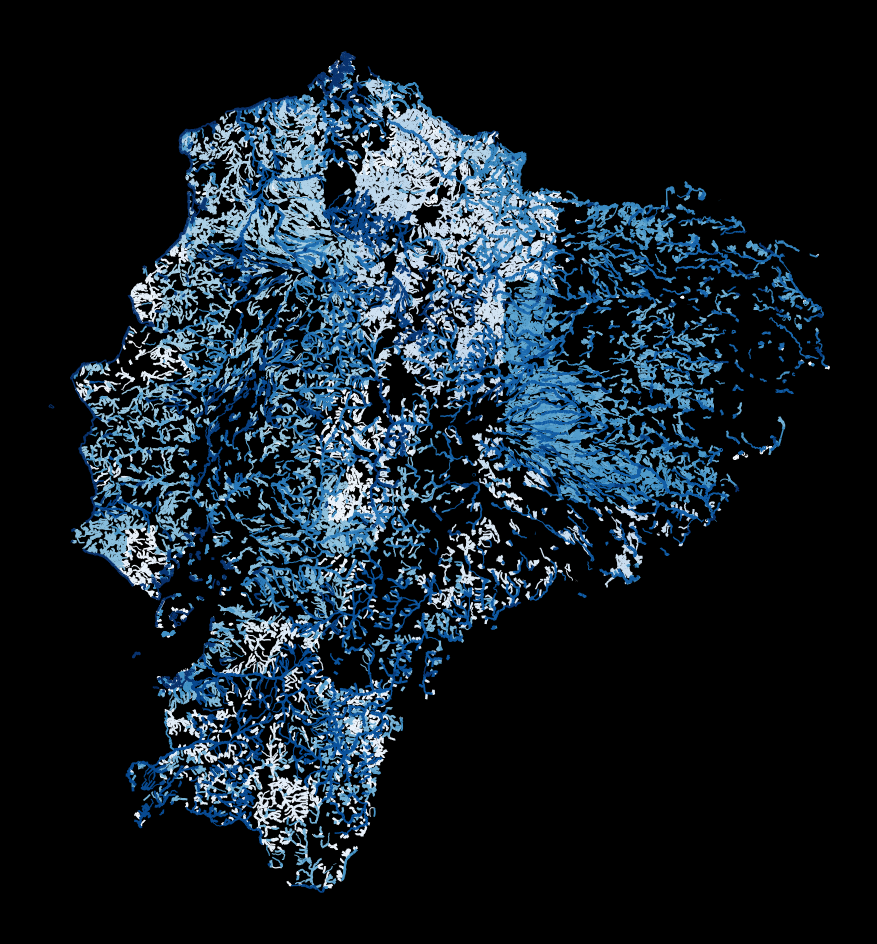

In [39]:
# Plot the river geometries with varying line widths and a blue color gradient (cmap='Blues')
f, ax = plt.subplots(1, 1, figsize=(15, 12))

rivers_ec2.geometry.plot(ax=ax, linewidth=rivers_ec2['width'], cmap='Blues')

# Set background colors for aesthetic visualization
f.patch.set_facecolor('k')
ax.set_facecolor('k')

ax.axis('off')
f.show()